<a href="https://colab.research.google.com/github/chandhu2102/Bug_Report_Classification/blob/main/Bug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install seaborn
! pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip install chart-studio
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/cm1.csv')
data.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.3 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [ ]:
defect_true_false = data.groupby('defects')['b'].apply(lambda x: x.count())
print('False: ',defect_true_false[0])
print('True: ',defect_true_false[1])

False:  449
True:  49


In [ ]:
print(data.defects.head())
print(data.defects.isnull().sum())

0    False
1     True
2    False
3    False
4    False
Name: defects, dtype: bool
0


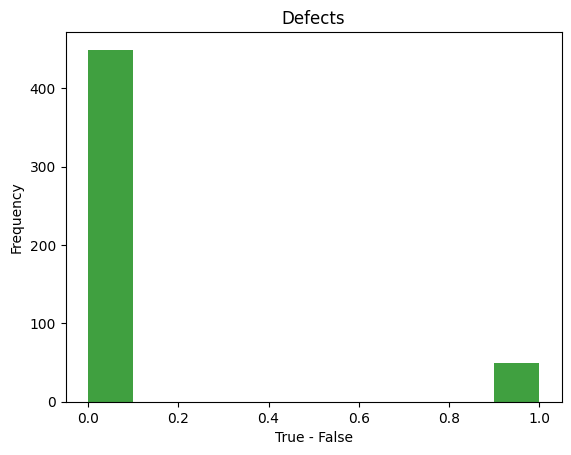

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.942908,0.773607,0.919270,0.940466,0.952699,-0.357998,0.728502,0.797565,0.814611,...,0.679721,0.862704,0.679942,-0.040300,0.803036,0.943241,0.941778,0.929347,0.940823,0.246467
v(g),0.942908,1.000000,0.806544,0.929741,0.907581,0.919714,-0.342571,0.773446,0.668793,0.856458,...,0.733292,0.795747,0.666712,-0.029726,0.801255,0.860150,0.910242,0.894691,0.991826,0.166761
ev(g),0.773607,0.806544,1.000000,0.714994,0.770008,0.773645,-0.280011,0.675765,0.554699,0.685490,...,0.605862,0.682972,0.568783,-0.020170,0.649567,0.710749,0.775750,0.753672,0.829226,0.105047
iv(g),0.919270,0.929741,0.714994,1.000000,0.870063,0.889894,-0.300078,0.679901,0.696397,0.826191,...,0.674501,0.739883,0.647548,-0.024960,0.755188,0.857157,0.873645,0.856111,0.911202,0.202645
n,0.940466,0.907581,0.770008,0.870063,1.000000,0.993306,-0.397294,0.841433,0.810141,0.844168,...,0.727183,0.794619,0.731518,-0.038936,0.837047,0.947383,0.997563,0.994124,0.912958,0.214049
v,0.952699,0.919714,0.773645,0.889894,0.993306,1.000000,-0.346625,0.797672,0.792191,0.876855,...,0.731986,0.813944,0.721394,-0.032055,0.808148,0.948709,0.990824,0.987568,0.920633,0.206623
l,-0.357998,-0.342571,-0.280011,-0.300078,-0.397294,-0.346625,1.000000,-0.540916,-0.404108,-0.196933,...,-0.266412,-0.289062,-0.331775,0.398689,-0.629990,-0.402986,-0.397856,-0.392290,-0.358672,-0.132567
d,0.728502,0.773446,0.675765,0.679901,0.841433,0.797672,-0.540916,1.000000,0.514898,0.717773,...,0.614364,0.614590,0.642382,-0.057531,0.884115,0.697731,0.840947,0.834040,0.773032,0.168173
i,0.797565,0.668793,0.554699,0.696397,0.810141,0.792191,-0.404108,0.514898,1.000000,0.468739,...,0.511707,0.645486,0.580700,-0.060712,0.649853,0.914101,0.809787,0.802842,0.699037,0.267764
e,0.814611,0.856458,0.685490,0.826191,0.844168,0.876855,-0.196933,0.717773,0.468739,1.000000,...,0.664990,0.683293,0.591581,-0.015676,0.656657,0.715288,0.842162,0.839142,0.825467,0.097784


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data.defects' is your boolean data
# Convert boolean data to integers (0 for False, 1 for True)
defects_numeric = data.defects.fillna(False).astype(np.uint8)

plt.hist(defects_numeric, bins=10, alpha=0.75, color='green')
plt.title('Defects')
plt.xlabel('True - False')
plt.ylabel('Frequency')
plt.show()
data.corr()

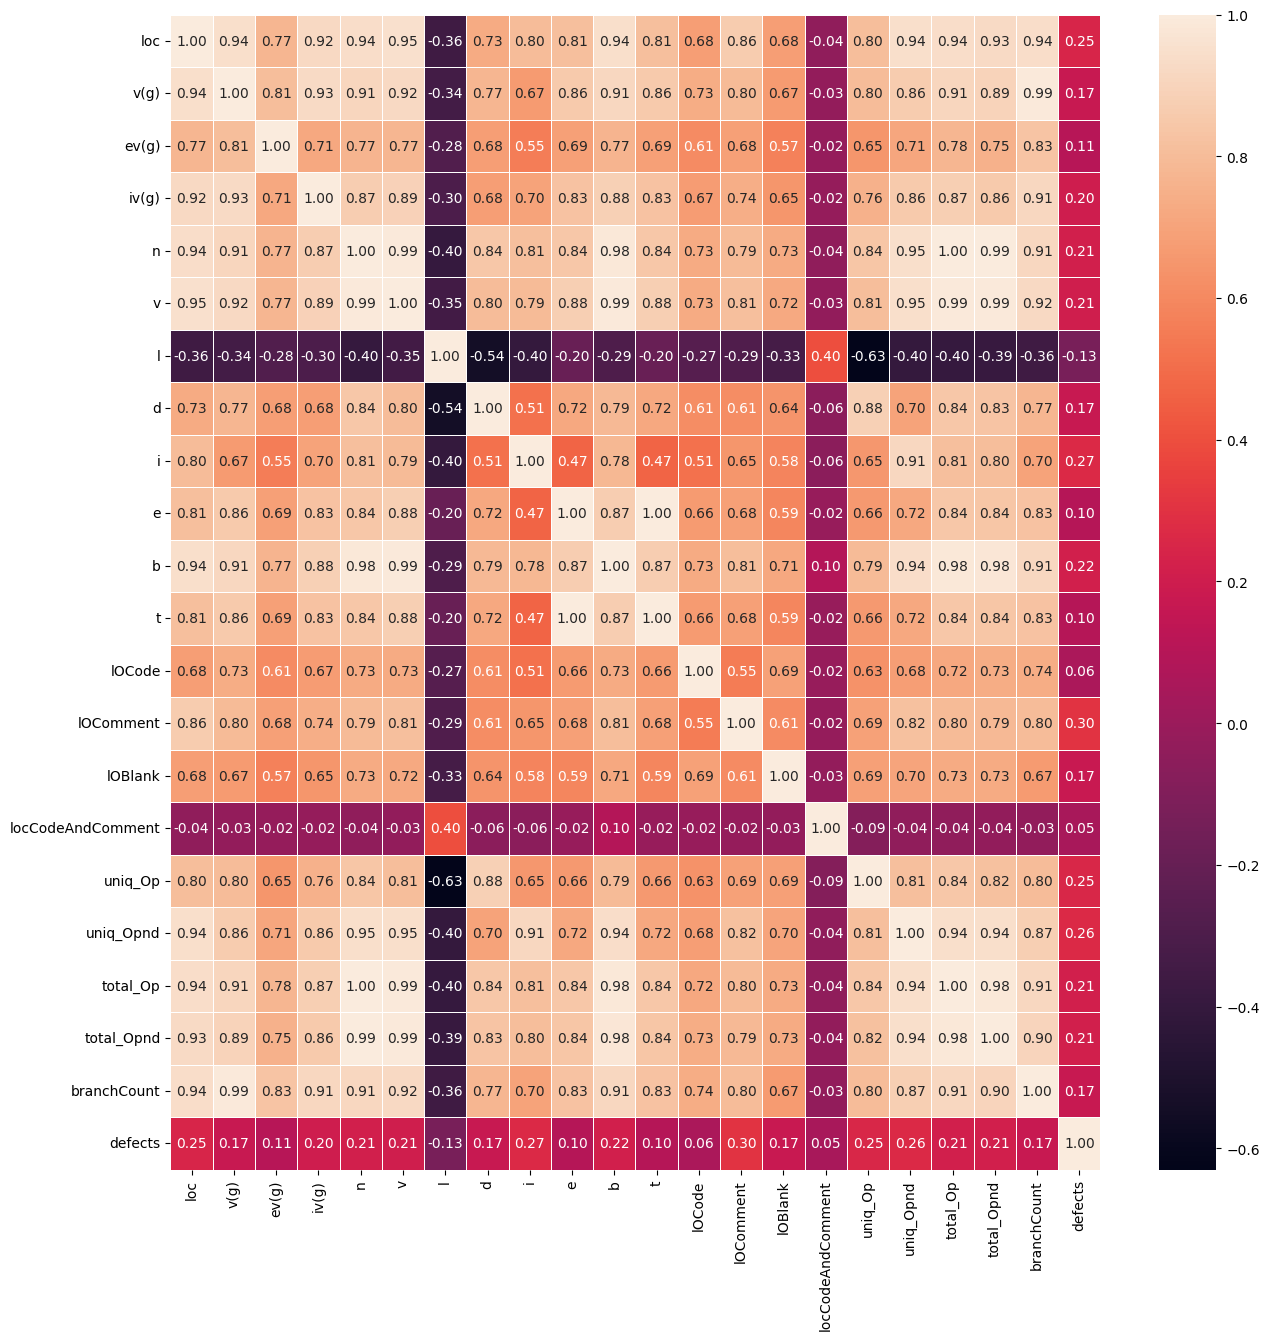

In [ ]:
ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()


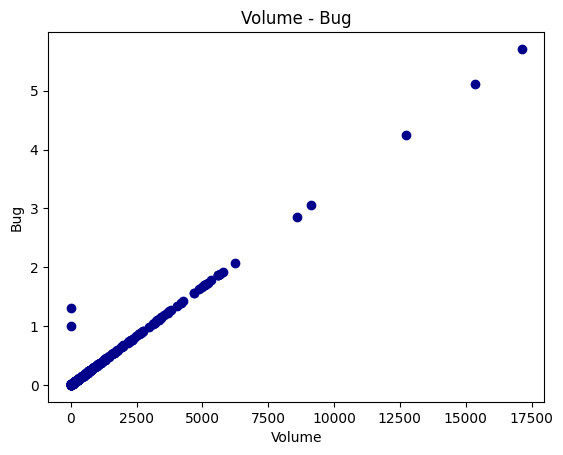

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.v, data.b, color='darkblue')
plt.title('Volume - Bug')
plt.xlabel('Volume')
plt.ylabel('Bug')
plt.show()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   498 non-null    float64
 1   v(g)                  498 non-null    float64
 2   ev(g)                 498 non-null    float64
 3   iv(g)                 498 non-null    float64
 4   n                     498 non-null    float64
 5   v                     498 non-null    float64
 6   l                     498 non-null    float64
 7   d                     498 non-null    float64
 8   i                     498 non-null    float64
 9   e                     498 non-null    float64
 10  b                     498 non-null    float64
 11  t                     498 non-null    float64
 12  lOCode                498 non-null    int64  
 13  lOComment             498 non-null    int64  
 14  lOBlank               498 non-null    int64  
 15  locCodeAndComment     4

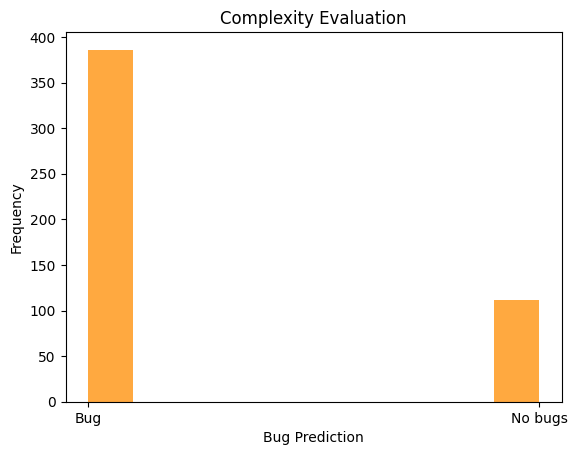

In [ ]:
def evaluation_control(data):
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Bug' if evaluation == True else 'No bugs' for evaluation in data.complexityEvaluation]
evaluation_control(data)
data
data.info()
data.groupby("complexityEvaluation").size()
import matplotlib.pyplot as plt

# Assuming 'data' is defined somewhere
plt.hist(data.complexityEvaluation, bins=10, alpha=0.75, color='darkorange')
plt.title('Complexity Evaluation')
plt.xlabel('Bug Prediction')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   498 non-null    float64
 1   v(g)                  498 non-null    float64
 2   ev(g)                 498 non-null    float64
 3   iv(g)                 498 non-null    float64
 4   n                     498 non-null    float64
 5   v                     498 non-null    float64
 6   l                     498 non-null    float64
 7   d                     498 non-null    float64
 8   i                     498 non-null    float64
 9   e                     498 non-null    float64
 10  b                     498 non-null    float64
 11  t                     498 non-null    float64
 12  lOCode                498 non-null    int64  
 13  lOComment             498 non-null    int64  
 14  lOBlank               498 non-null    int64  
 15  locCodeAndComment     4

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values
Y

#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1.0,0.0,6.0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0.0,0.0,3.0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0.0,0.0,3.0


K-Nearest Neighbors Algorithm
              precision    recall  f1-score   support

         Bug       0.99      1.00      0.99        79
     No bugs       1.00      0.95      0.98        21

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.98       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix for Training Data:
[[79  0]
 [ 1 20]]
Accuracy Score for Training Data: 99.0


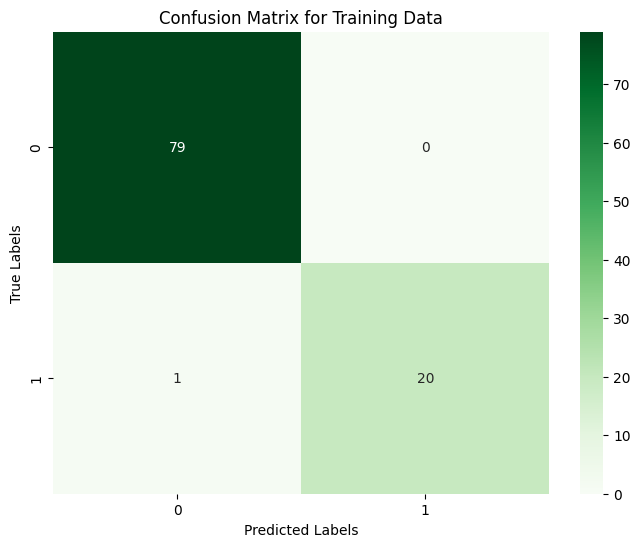


KNN - Test Data
              precision    recall  f1-score   support

         Bug       0.99      1.00      0.99        79
     No bugs       1.00      0.95      0.98        21

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.98       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix for Test Data:
[[79  0]
 [ 1 20]]
Accuracy Score for Test Data: 99.0


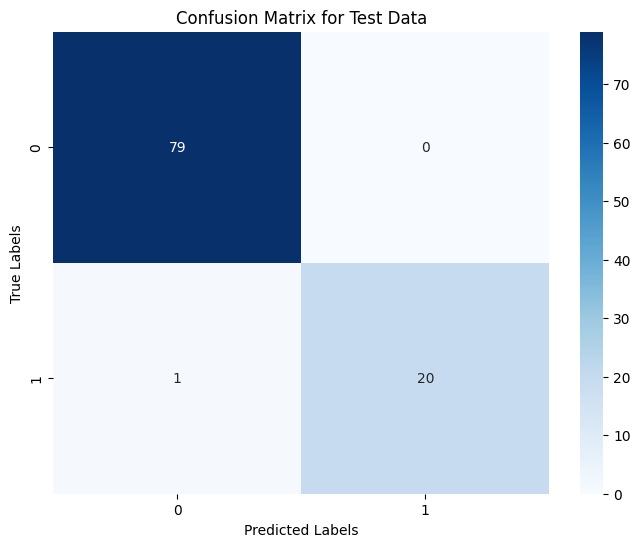

In [ ]:
#K-Nearest Neighbors
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("K-Nearest Neighbors Algorithm")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Training Data:", 100*accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nKNN - Test Data")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Test Data:", 100*accuracy_score(y_test, y_pred))

# Plotting the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression
              precision    recall  f1-score   support

         Bug       0.99      0.99      0.99        79
     No bugs       0.95      0.95      0.95        21

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix for Training Data:
[[78  1]
 [ 1 20]]
Accuracy Score for Training Data: 98.0


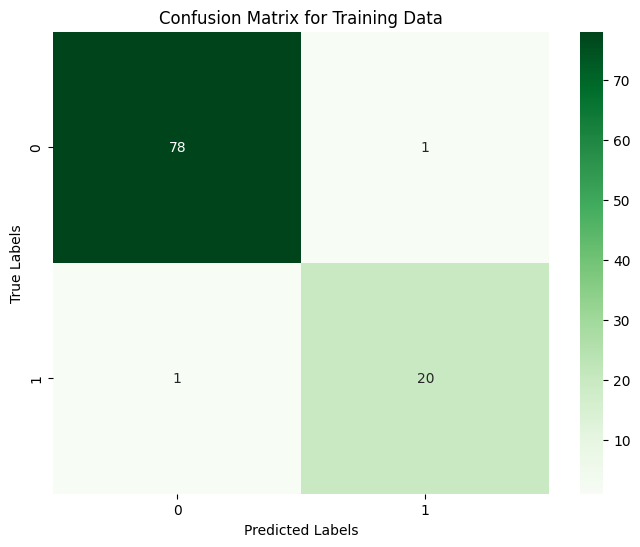


Logistic Regression - Test Data
              precision    recall  f1-score   support

         Bug       0.99      0.99      0.99        79
     No bugs       0.95      0.95      0.95        21

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix for Test Data:
[[78  1]
 [ 1 20]]
Accuracy Score for Test Data: 98.0


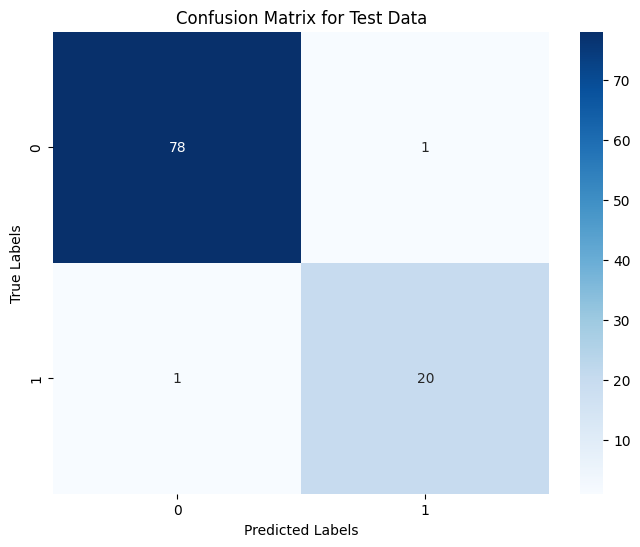

In [ ]:
#Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Training Data:", 100*accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nLogistic Regression - Test Data")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Test Data:", 100*accuracy_score(y_test, y_pred))

# Plotting the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Gradient Boosting Algorithm
              precision    recall  f1-score   support

         Bug       1.00      1.00      1.00        79
     No bugs       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Training Data:
[[79  0]
 [ 0 21]]
Accuracy Score for Training Data: 100.0


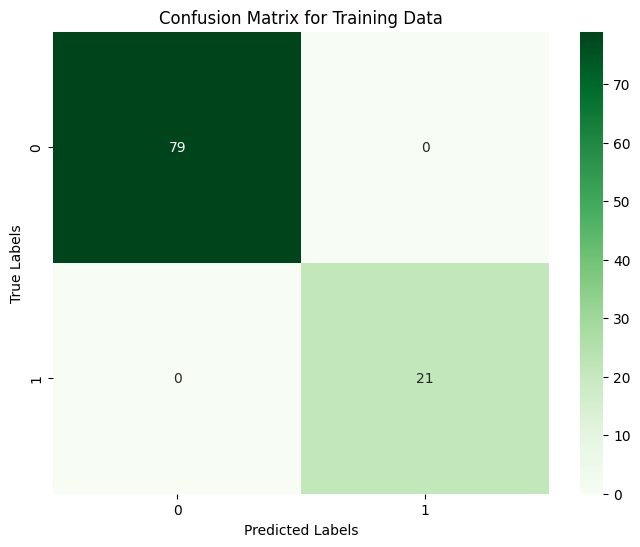


Gradient Boost - Test Data
              precision    recall  f1-score   support

         Bug       1.00      1.00      1.00        79
     No bugs       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Test Data:
[[79  0]
 [ 0 21]]
Accuracy Score for Test Data: 100.0


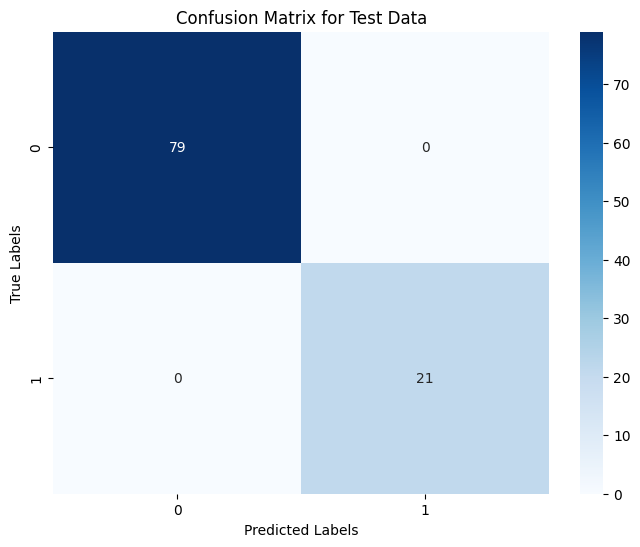

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier
print("Gradient Boosting Algorithm")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Training Data:", 100*accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nGradient Boost - Test Data")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Test Data:", 100*accuracy_score(y_test, y_pred))

# Plotting the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

XG Boost 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Training Data:
[[79  0]
 [ 0 21]]
Accuracy Score for Training Data: 100.0


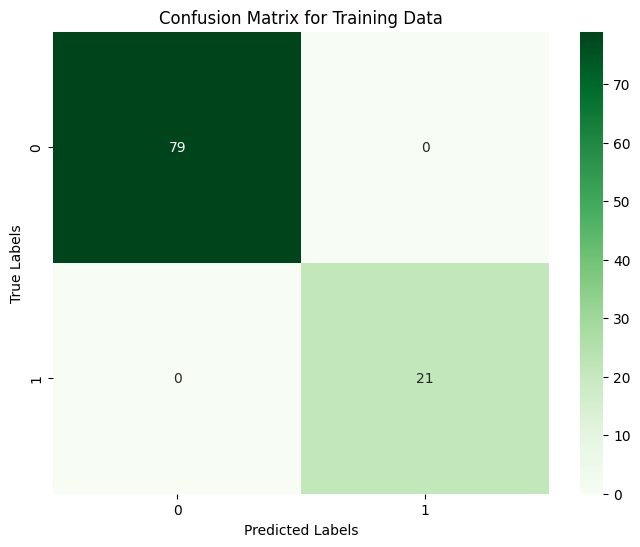


XG Boost - Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Test Data:
[[79  0]
 [ 0 21]]
Accuracy Score for Test Data: 100.0


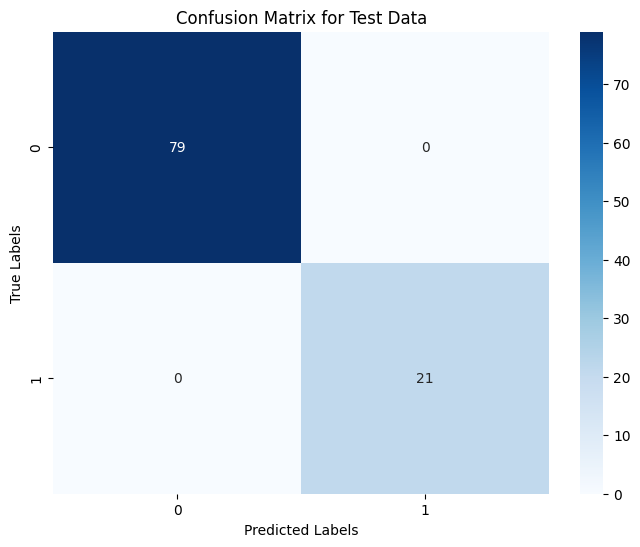

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("XG Boost ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Training Data:", 100*accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nXG Boost - Test Data")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Test Data:", 100*accuracy_score(y_test, y_pred))

# Plotting the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

SVM Algorithm
              precision    recall  f1-score   support

         Bug       1.00      1.00      1.00        79
     No bugs       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Training Data:
[[79  0]
 [ 0 21]]
Accuracy Score for Training Data: 100.0


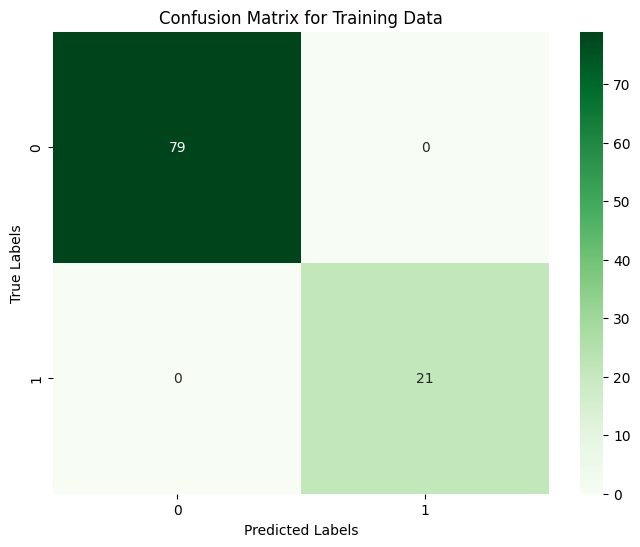


SVM - Test Data
              precision    recall  f1-score   support

         Bug       1.00      1.00      1.00        79
     No bugs       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Test Data:
[[79  0]
 [ 0 21]]
Accuracy Score for Test Data: 100.0


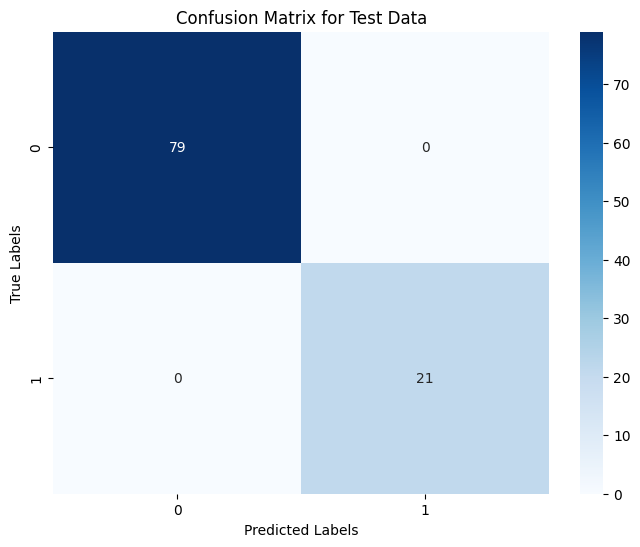

In [ ]:
#SVM
from sklearn import svm
from sklearn.metrics import accuracy_score
model = svm.SVC(kernel='linear', C=0.01)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("SVM Algorithm")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Training Data:", 100*accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nSVM - Test Data")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Test Data:", 100*accuracy_score(y_test, y_pred))

# Plotting the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Decision Tree Algorithm - Training Data
              precision    recall  f1-score   support

         Bug       1.00      1.00      1.00        79
     No bugs       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Training Data:
[[79  0]
 [ 0 21]]
Accuracy Score for Training Data: 100.0


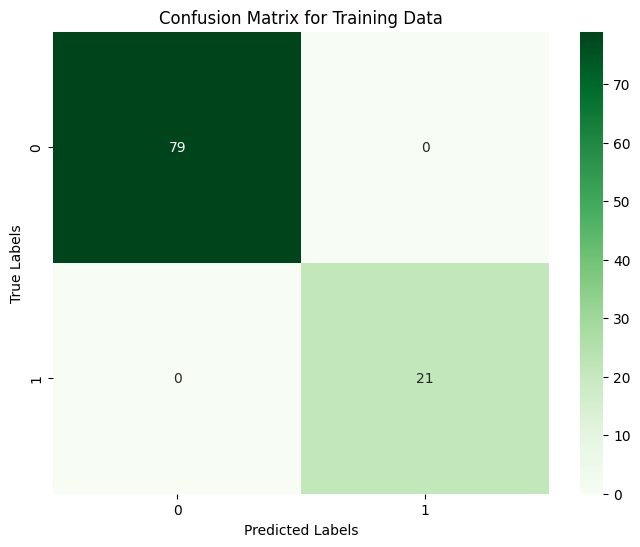


Decision Tree Algorithm - Test Data
              precision    recall  f1-score   support

         Bug       1.00      1.00      1.00        79
     No bugs       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Test Data:
[[79  0]
 [ 0 21]]
Accuracy Score for Test Data: 100.0


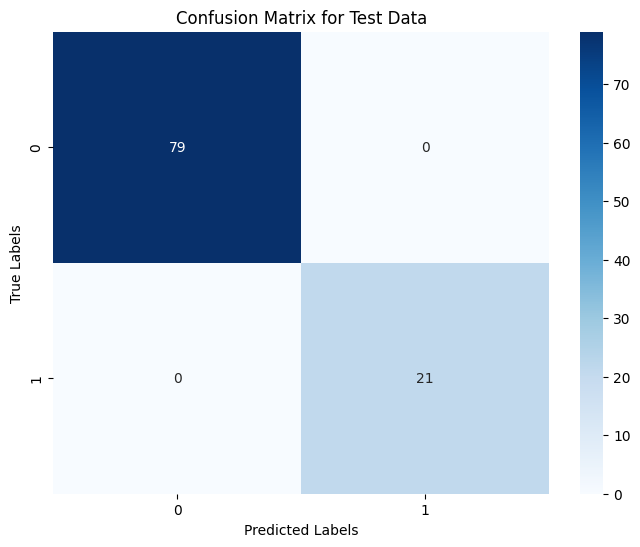

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
model = tree.DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm - Training Data")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Training Data:", 100*accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("\nDecision Tree Algorithm - Test Data")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score for Test Data:", 100*accuracy_score(y_test, y_pred))

# Plotting the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()